In [77]:
from __future__ import division
from keras.layers import Input, Activation, Dense, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import add
from keras.regularizers import l2
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import os, sys, shutil

In [78]:
input_layer = Input(shape=(200,200,3))
conv1_1 = Conv2D(filters=64,kernel_size=(7,7),strides=(3,3), kernel_initializer="he_normal",kernel_regularizer=l2(1e-4))(input_layer)
batchNormal1 = BatchNormalization(axis=3)(conv1_1)
activation1 = Activation('relu')(batchNormal1)
mp2d1 = MaxPooling2D((3,3),strides=(2,2), padding="same")(activation1)

conv2_1 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same")(mp2d1)
batchNormal2 = BatchNormalization(axis = 3)(conv2_1)
activation2 = Activation('relu')(batchNormal2)
conv2_2 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same")(activation2)

res1_batchNormal1_1 = BatchNormalization(axis = 3)(mp2d1)
res1_relu1_1 = Activation('relu')(res1_batchNormal1_1)
res1_conv1_1 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same")(res1_relu1_1)
res1_batchNormal1_2 = BatchNormalization(axis = 3)(res1_conv1_1)
res1_relu1_2 = Activation('relu')(res1_batchNormal1_2)
res1_conv1_2 = Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="same")(res1_relu1_2)

input_shape = K.int_shape(conv2_2)
residual_shape = K.int_shape(res1_conv1_2)
stride_width = int(round(input_shape[1] / residual_shape[2]))
stride_height = int(round(input_shape[2] / residual_shape[1]))
equal_channels = input_shape[3]

shortcut = conv2_2

if stride_width > 1 or stride_height > 1 or not equal_channels :
    shortcut = Conv2D(filters = residual_shape[3], 
                      kernel_size=(1,1),
                      strides=(strides_width, strides_height),
                      padding=("valid"),
                      kernel_initializer = "he_normal",
                      kernel_regularizer = l2(0.0001))(conv2_2)

block1 = add([shortcut, res1_conv1_2])
#model = Model(inputs=input_layer, outputs=block1)
#model.summary()
#input_layer 와 1번째 residual block

In [79]:


conv3_1 = Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same")(block1)
batchNormal3 = BatchNormalization(axis = 3)(conv3_1)
activation3 = Activation('relu')(batchNormal3)
conv3_2 = Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same")(activation3)

res2_batchNormal2_1 = BatchNormalization(axis = 3)(block1)
res2_relu2_1 = Activation('relu')(res2_batchNormal2_1)
res2_conv2_1 = Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding="same")(res2_relu2_1)
res2_batchNormal2_2 = BatchNormalization(axis = 3)(res2_conv2_1)
res2_relu2_2 = Activation('relu')(res2_batchNormal2_2)
res2_conv2_2 = Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same")(res2_relu2_2)

input_shape = K.int_shape(conv3_2)
residual_shape = K.int_shape(res2_conv2_2)
stride_width = int(round(input_shape[1] / residual_shape[2]))
stride_height = int(round(input_shape[2] / residual_shape[1]))
equal_channels = input_shape[3]

shortcut = conv3_2

if stride_width > 1 or stride_height > 1 or not equal_channels :
    shortcut = Conv2D(filters = residual_shape[3], 
                      kernel_size=(1,1),
                      strides=(strides_width, strides_height),
                      padding=("valid"),
                      kernel_initializer = "he_normal",
                      kernel_regularizer = l2(0.0001))(conv2_2)

block2 = add([shortcut, res2_conv2_2])

#model = Model(inputs=input_layer, outputs=block2)
#model.summary()
#2번째 residual block

In [80]:

conv4_1 = Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same")(block2)
batchNormal4 = BatchNormalization(axis = 3)(conv4_1)
activation4 = Activation('relu')(batchNormal4)
conv4_2 = Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding="same")(activation4)

res3_batchNormal3_1 = BatchNormalization(axis = 3)(block2)
res3_relu3_1 = Activation('relu')(res3_batchNormal3_1)
res3_conv3_1 = Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="same")(res3_relu3_1)
res3_batchNormal3_2 = BatchNormalization(axis = 3)(res3_conv3_1)
res3_relu3_2 = Activation('relu')(res3_batchNormal3_2)
res3_conv3_2 = Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding="same")(res3_relu3_2)

input_shape = K.int_shape(conv4_2)
residual_shape = K.int_shape(res3_conv3_2)
stride_width = int(round(input_shape[1] / residual_shape[2]))
stride_height = int(round(input_shape[2] / residual_shape[1]))
equal_channels = input_shape[3]

shortcut = conv4_2

if stride_width > 1 or stride_height > 1 or not equal_channels :
    shortcut = Conv2D(filters = residual_shape[3], 
                      kernel_size=(1,1),
                      strides=(strides_width, strides_height),
                      padding=("valid"),
                      kernel_initializer = "he_normal",
                      kernel_regularizer = l2(0.0001))(conv2_2)

block3 = add([shortcut, res3_conv3_2])

#model = Model(inputs=input_layer, outputs=block3)
#model.summary()
#3번째 residual block

In [81]:

conv5_1 = Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same")(block3)
batchNormal5 = BatchNormalization(axis = 3)(conv5_1)
activation5 = Activation('relu')(batchNormal5)
conv5_2 = Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding="same")(activation5)

res4_batchNormal4_1 = BatchNormalization(axis = 3)(block3)
res4_relu4_1 = Activation('relu')(res4_batchNormal4_1)
res4_conv4_1 = Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding="same")(res4_relu4_1)
res4_batchNormal4_2 = BatchNormalization(axis = 3)(res4_conv4_1)
res4_relu4_2 = Activation('relu')(res4_batchNormal4_2)
res4_conv4_2 = Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding="same")(res4_relu4_2)

input_shape = K.int_shape(conv5_2)
residual_shape = K.int_shape(res3_conv3_2)
stride_width = int(round(input_shape[1] / residual_shape[2]))
stride_height = int(round(input_shape[2] / residual_shape[1]))
equal_channels = input_shape[3]

shortcut = conv5_2

if stride_width > 1 or stride_height > 1 or not equal_channels :
    shortcut = Conv2D(filters = residual_shape[3], 
                      kernel_size=(1,1),
                      strides=(strides_width, strides_height),
                      padding=("valid"),
                      kernel_initializer = "he_normal",
                      kernel_regularizer = l2(0.0001))(conv2_2)

final_block = add([shortcut, res4_conv4_2])

#model = Model(inputs=input_layer, outputs=final_block)
#model.summary()
#4번째 마지막 residual block

In [82]:
batchNormal6 = BatchNormalization(axis = 3)(final_block)
activation6 = Activation('relu')(batchNormal6)

last_shape = K.int_shape(activation6)
avg_p_2d = AveragePooling2D(pool_size = (last_shape[1],last_shape[2]), strides=(1,1))(activation6)
flatten = Flatten()(avg_p_2d)
dense = Dense(units = 1, kernel_initializer="he_normal", activation="sigmoid")(flatten)

model = Model(inputs=input_layer, outputs=dense)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_136 (Conv2D)             (None, 65, 65, 64)   9472        input_15[0][0]                   
__________________________________________________________________________________________________
batch_normalization_114 (BatchN (None, 65, 65, 64)   256         conv2d_136[0][0]                 
__________________________________________________________________________________________________
activation_114 (Activation)     (None, 65, 65, 64)   0           batch_normalization_114[0][0]    
__________________________________________________________________________________________________
max_poolin

In [83]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,    
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)



train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (200,200),
    batch_size = 64,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'validation',
    target_size = (200,200),
    batch_size = 64,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size = (200,200),
    batch_size = 64,
    class_mode = 'binary'
)

Found 961 images belonging to 2 classes.
Found 354 images belonging to 2 classes.
Found 356 images belonging to 2 classes.


In [84]:
model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

In [85]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 20,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 30
)

Epoch 1/30
20/20 [==============================] - 80s 4s/step - loss: 0.8190 - acc: 0.6296 - val_loss: 4.5686 - val_acc: 0.4802
Epoch 2/30
20/20 [==============================] - 76s 4s/step - loss: 0.5903 - acc: 0.7032 - val_loss: 0.8829 - val_acc: 0.6977
Epoch 3/30
20/20 [==============================] - 77s 4s/step - loss: 0.5611 - acc: 0.7517 - val_loss: 2.7702 - val_acc: 0.4774
Epoch 4/30
20/20 [==============================] - 75s 4s/step - loss: 0.5131 - acc: 0.7770 - val_loss: 8.5623 - val_acc: 0.4548
Epoch 5/30
20/20 [==============================] - 77s 4s/step - loss: 0.5837 - acc: 0.7291 - val_loss: 1.2808 - val_acc: 0.5113
Epoch 6/30
20/20 [==============================] - 77s 4s/step - loss: 0.4713 - acc: 0.7628 - val_loss: 3.6271 - val_acc: 0.4576
Epoch 7/30
20/20 [==============================] - 77s 4s/step - loss: 0.4682 - acc: 0.7581 - val_loss: 0.8283 - val_acc: 0.7119
Epoch 8/30
20/20 [==============================] - 74s 4s/step - loss: 0.4097 - acc: 0.83

loss :  0.3003125403541744
acc :  0.8729661207228427

val_loss :  1.8111234203171824
val_acc :  0.6284369118391008


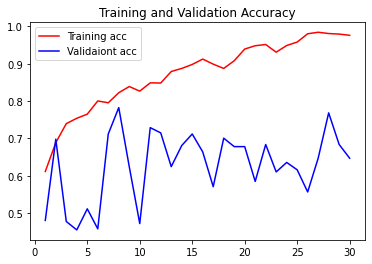

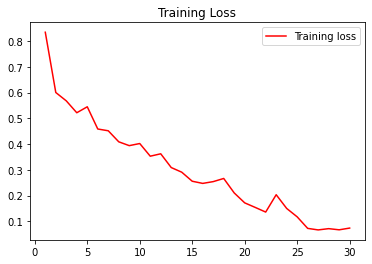

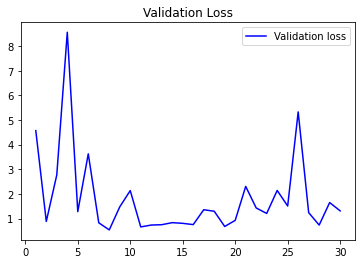

In [86]:
import matplotlib.pyplot as plt
import numpy as np

history_data = history.history
history_data.keys()

loss = history_data['loss']
acc = history_data['acc']
val_loss = history_data['val_loss']
val_acc = history_data['val_acc']

print("loss : ", np.mean(loss))
print("acc : ", np.mean(acc))
print()
print("val_loss : ", np.mean(val_loss))
print("val_acc : ", np.mean(val_acc))



epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validaiont acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.title('Training Loss')
plt.legend()
plt.show()

plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Validation Loss')
plt.legend()
plt.show()

In [87]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print("test_acc : ", test_acc)
print("test_loss : ",test_loss)

test_acc :  0.6942204296268443
test_loss :  1.0875779470448852


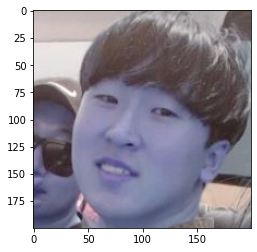

[[Handsome -> 81.17%]]


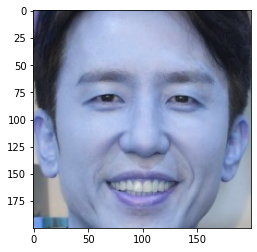

[[Handsome -> 99.93%]]


In [90]:
import cv2
img = cv2.imread('face.jpg', cv2.IMREAD_COLOR)
img3 = cv2.imread('notme.jpg', cv2.IMREAD_COLOR)

img2 = img
img4 = img3

img = cv2.resize(img, dsize=(200,200), interpolation = cv2.INTER_AREA)
img = img.astype('float32')/255
img = img.reshape((1,200,200,3))
img3 = cv2.resize(img3, dsize=(200,200), interpolation = cv2.INTER_AREA)
img3 = img3.astype('float32')/255
img3 = img3.reshape((1,200,200,3))



predict_img = model.predict(img, steps =1)
predict_img2 = model.predict(img3, steps=1)

np.set_printoptions(formatter = {'float':lambda x: "Handsome -> {0:0.2f}%".format(x*100)})

plt.imshow(img2)
plt.show()
print(predict_img)

plt.imshow(img4)
plt.show()
print(predict_img2)